## Overview

In this homework, we will download some text from the well-known <a href="https://en.wikipedia.org/wiki/Brown_Corpus"> Brown Corpus</a> in the Natural Language Toolkit (NLTK),
and explore some of its statistical properties.

In addition to exploring the Wiki page just linked, you may also want to consult section 1.3 of the book chapter  <a href="https://www.nltk.org/book/ch02.html">Accessing Text Corpora and Lexical Resources</a> accompanying the NLTK system.  

We are going to collect some basic statistical information about this corpus, and display it in various useful forms.  Consult the <a href="https://www.cs.bu.edu/fac/snyder/cs237/tutorials/">tutorials</a> as described above (especially <code>PythonRefresher.ipynb</code>) for recipes for dictionaries, sets, plots, and bar charts; for this first
homework, we are providing sample outputs of at least the figures at the bottom of this notebook to guide your thinking. You should try to duplicate these closely, especially with titles, axis labels, and legends.

You may add additional code as needed, but
anything other than simply filling in where it says <code># your code here</code> should be accompanied by appropriate comments explaining what it does.

Read through the next few cells and understand what the code is doing, and then
proceed to the problems.


In [19]:
import numpy as np
import nltk

# The first time you will need to download the corpus:

nltk.download('brown')

# After the first time, Python will see that you already have it and not download it again.
# This is a typical paradigm for datasets that you download onto your local machine.


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [20]:
from nltk.corpus import brown

# We can access various components of this multi-text corpus: words, sentences, and
# paragraphs, both raw and tagged with part-of-speech (POS) labels.
# (We won't be using the tagged ones right now.)

print("Words (a list of strings):\n")
print(brown.words())

print("\nWords with POS tags:\n")
print(brown.tagged_words())

print("\nSentences (a list of lists of strings):\n")
print(brown.sents())

print("\nSentences with POS-tagged words:\n")
print(brown.tagged_sents())

print("\nParagraphs (a list of lists of lists of strings):\n")
print(brown.paras())

print("\nParagraphs in various categories, here are reviews:\n")
print(brown.paras(categories='reviews'))


Words (a list of strings):

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

Words with POS tags:

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

Sentences (a list of lists of strings):

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

Sentences with POS-tagged words:

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigat

### Problem One (40 points): Characters

First we will explore this corpus at the level of characters. Each part of the problem is worth 10 points.

In [21]:
# Part A

# Print out the number of occurrences of characters in the brown corpus. There are no restrictions, so letters,
# upper or lower case, parentheses, etc., any character  at all in the list of words.
# Make this readable by a human, e.g., "There are xxx occurrences of characters in the Brown corpus."

# Hint: use the brown.words list and read about the Python join function. You'll be using this list
# of characters a lot in this problem, so calculate it once and assign it to an appropriately-named variable.

# I strongly recommend you read about f-strings (introduced in Python 3.6) and use them as your default format
# for Python print statements.


# Your code here
brownjoinedlist="".join(brown.words())#String(List of characters) with no restrictions
charcount=len(brownjoinedlist)
print(f"There are {charcount} occurrences of characters in the Brown corpus.")


There are 4965882 occurrences of characters in the Brown corpus.


In [22]:
# Part B

# Print out the number of unique characters which occur in the Brown corpus (in other words, duplicate
# occurrences do not count), and then print out a string consisting of all these characters, sorted in order.
# Again, always print this information out in a readable form: "There are xxx unique...."

# Hint: read about the Python functions set(...) and sorted(...)
uniqueoccurences=set(brownjoinedlist)#Unique characters
sortedchar = sorted(uniqueoccurences)#Sorted according to ASCII
uniquecount=len(sortedchar)
print(f"Unique characters in sorted order: {''.join(sortedchar)}.")
print(f"There are {uniquecount} unique occurrences of characters in the Brown corpus.")
# Your code here

Unique characters in sorted order: !$%&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]`abcdefghijklmnopqrstuvwxyz{}.
There are 83 unique occurrences of characters in the Brown corpus.


#### NOTE:  We will NOT be using the list of unique characters in the rest of this problem; whenever 'characters' are mentioned, we mean occurrences of characters, as in Part A.

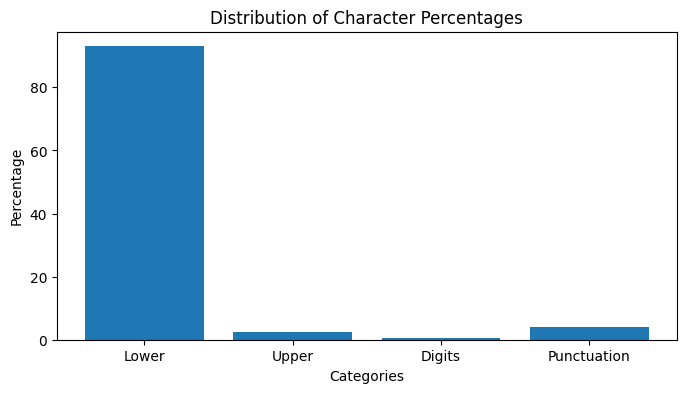

In [23]:
# Part C

# Display a bar chart of the percentages of the characters that are in the following categories:  ASCII lower-case letters,
# ASCII upper-case letters, digits, punctuation marks (the Brown corpus does not contain anything but these).
# Display this as a bar chart, labelling each of the bars as 'Lower', 'Upper','Digits', 'Punctuation'.
# You do not need to show the exact percentages in the figure (see the sample output).

# Use a figsize of (8,4) so that the figures are not too small.

# Hint: import the Python string library (see https://docs.python.org/3/library/string.html) and use the
# string constants specified there. Look at the "Probability Distribution for Coin Flips" in the
# PythonRefresher for how to create bar charts with labels on the bars.

# Be sure to give percentages on the Y axis, not probabilities.

# For a sample of what we expect, see the very bottom of this notebook.

# Your code here
import matplotlib.pyplot as plt
import string

lowercount, uppercount, digitcount, pcount = 0, 0, 0, 0

for i in brownjoinedlist:
    if i in string.ascii_lowercase:
        lowercount += 1 #count of lower case characters
    elif i in string.ascii_uppercase:
        uppercount += 1 #count of upper case characters
    elif i in string.digits:
        digitcount += 1 #count of digits
    elif i in string.punctuation:
        pcount += 1 #count of punctuations

lowerpercent = (lowercount / charcount) * 100
upperpercent = (uppercount / charcount) * 100
digitpercent = (digitcount / charcount) * 100
ppercent = (pcount / charcount) * 100

types = [0,1,2,3]
p = [lowerpercent,upperpercent,digitpercent,ppercent]
labels = ['Lower', 'Upper','Digits','Punctuation']

plt.figure(num=None, figsize=(8, 4))
plt.xticks(types, labels)
plt.bar(types,p)
plt.title('Distribution of Character Percentages')
plt.ylabel("Percentage")
plt.xlabel("Categories")
plt.show()

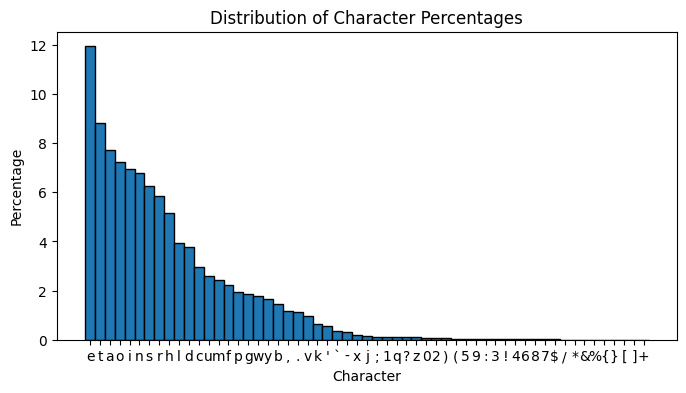

In [24]:
# Part D

# Print out a bar chart of the percentages of each character, in decreasing order. Make this case-insensitive,
# so upper and lower letters are different; for example 'H' and 'h' are the same letter.

# Hint:  Read about the Python function lower() and Counter from the Collections library.

# For a sample of what we expect, see the very bottom of this notebook.

# Your code here
from collections import Counter

caseinsensitivechars=brownjoinedlist.lower()#lower case characters
caseinsensitivecount=Counter(caseinsensitivechars)#HashTable of characters and occurences
decorderchar=sorted(caseinsensitivecount.items(), key=lambda item: item[1], reverse=True)#sorted according to occurences
characters,counts=zip(*decorderchar)
percentages = [(count /charcount ) * 100 for count in counts]
plt.figure(num=None, figsize=(8, 4))
plt.bar(characters,percentages, width=1.0,edgecolor='black')
plt.title('Distribution of Character Percentages')
plt.ylabel("Percentage")
plt.xlabel("Character")
plt.show()

### Problem Two (50 points):  Words

Next we will explore the Brown corpus at the level of words. A "word" in this problem will be case-insensitive,
so you will create a list of the brown words in lower case and use it throughout the problem.

Each part is worth 10 points.

In [25]:
# Part A

# Print out the number of occurrences of words, and the number of unique words. Make your analysis
# case-insensitive (of course, this will only make a difference in the number of unique words).
# Print the answer out in human-readable form. Always make it easy for the reader to understand your results!

# Hint: First create a list of lower-case words, and use it throughout this problem instead of brown.words()

# Your code here
lowercaseword=[w.lower() for w in brown.words()]#List comprehension to convert to lower case
numlowercaseword=len(lowercaseword)
uniquelowerword=set(lowercaseword)
numuniquelowerword=len(uniquelowerword)
print(f"There are {numlowercaseword} occurrences of words in the Brown corpus.")
print(f"There are {numuniquelowerword} unique occurrences of words in the Brown corpus.")

There are 1161192 occurrences of words in the Brown corpus.
There are 49815 unique occurrences of words in the Brown corpus.


#### NOTE:  Again, we will NOT be using the list of unique words in the rest of this problem; whenever 'words' are mentioned, we mean occurrences of words, as in the first part of Part A.

In [26]:
# Part B

# Print out the length of the longest word(s), and all occurrences of words of that maximum length.
# Print each of the words on a separate line, preceeded by a tab '\t'.
# (There may be only one, and it may not look familiar -- just use the data as given!)
wordlen = [len(w) for w in lowercaseword]# list of length of words
maxlen = max(wordlen)
longestwords= [w for w in lowercaseword if len(w) == maxlen]#list of maximum length words
print(f"Length of the longest word(s) is {maxlen}.")
print("The longest word is")
for w in longestwords:
    print("\t" + w)

# Your code here

Length of the longest word(s) is 33.
The longest word is
	nnuolapertar-it-vuh-karti-birifw-


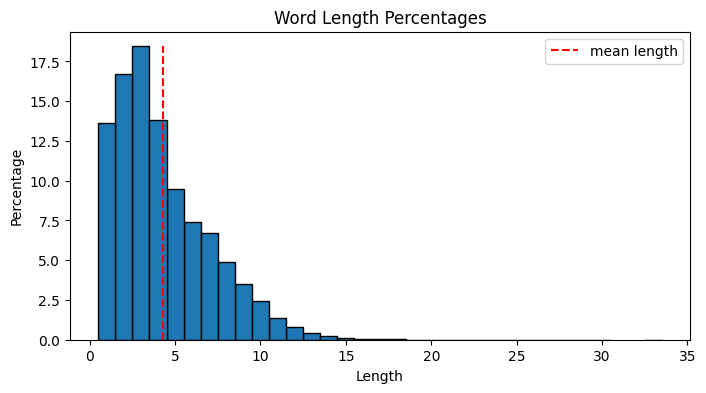

Average Word Length: 4.2765


In [27]:
# Part C

# Display a bar chart of the percentages of word lengths of all occurrences of words
# and give the average length of a word. Draw a dotted red vertical line whose height is the height
# of the highest bar, and whose x position is the average word length; give a legend explaining
# what the bar means (see PythonRefresher, as usual, for examples of how to do this).

# Print out a human-readable statement about the average word length (to 4 decimal places) below the bar chart.

# For a sample of what we expect, see the very bottom of this notebook.

# Your code here
import matplotlib.pyplot as plt
wordlencounts = Counter(wordlen)
wordlenpercent = [(length, count / numlowercaseword * 100) for length, count in wordlencounts.items()]
l, percent = zip(*wordlenpercent)
averagewordlen=sum(wordlen)/numlowercaseword # average length of words

plt.figure(num=None, figsize=(8, 4))
plt.bar(l,percent, width=1.0,edgecolor='black')
plt.vlines(x=averagewordlen, ymin=0, ymax=np.max(percent), color='red', linestyle='--', label='mean length')#vertical line of height max percent at average x
plt.legend()
plt.title('Word Length Percentages')
plt.ylabel("Percentage")
plt.xlabel("Length")
plt.show()

print(f"Average Word Length: {averagewordlen:.4f}")

In [28]:
# Part D

# Now we will consider word frequencies (expressed as percentages). To simplify matters, we will only
# allow "normal" words, i.e., those consisting of only lower-case letters, with possible single quotes,
# periods, and dashes. Since this involves regular expressions (we'll cover next Tuesday, 9/11),
# this code is provided.

# Your task in this problem is to give the twenty most common normal words, in decreasing order, and the percentage of
# all occurrences of normal words these represent. Be sure to give your answer as percentages to 2 decimal places.

# Hint: this is very similar to Part D in the previous problem.

import re

p = re.compile('[a-zA-Z\'.`-]+$')       # allow intra-word punctuation
q = re.compile('[\'".`-]+$')

def is_normal_word(w):
    return (p.match(w) and not q.match(w))

normalwords = [w for w in lowercaseword if is_normal_word(w)]#List of normal words

normalwordcounts=Counter(normalwords)
decorderword=sorted(normalwordcounts.items(), key=lambda item: item[1], reverse=True)#Sorted hashtable of normal words in decreasing order
words,counts=zip(*decorderword)
percentages = [(count /len(normalwords) ) * 100 for count in counts]#Percentages of normal words

print("Top Twenty Words and Percentages of Occurences")
for i in range(20):
  print(f"{words[i]}\t{percentages[i]:.2f}%")


# Your code here

Top Twenty Words and Percentages of Occurences
the	6.97%
of	3.63%
and	2.87%
to	2.61%
a	2.31%
in	2.13%
that	1.06%
is	1.01%
was	0.98%
he	0.95%
for	0.95%
it	0.87%
with	0.73%
as	0.72%
his	0.70%
on	0.67%
be	0.64%
at	0.54%
by	0.53%
i	0.51%


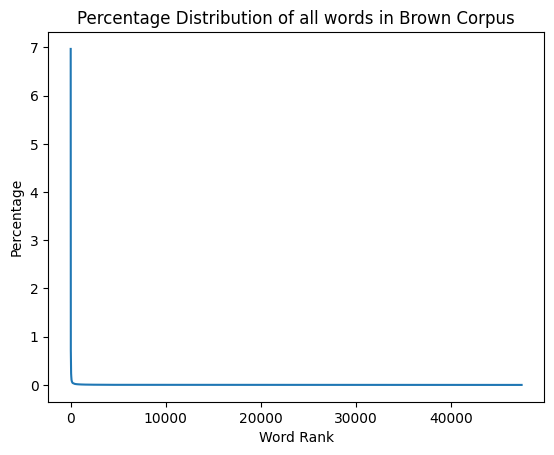

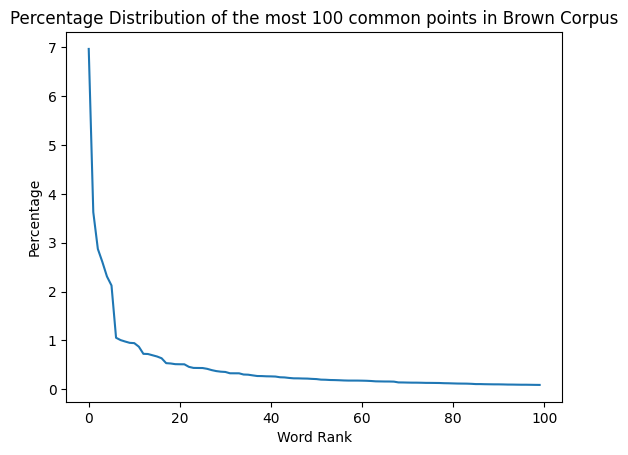

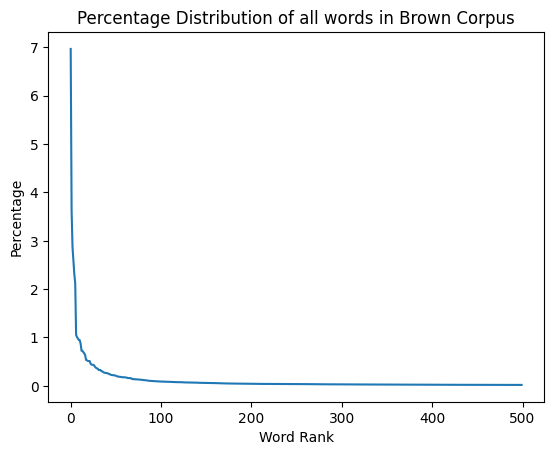

In [29]:
# Part E

# Now give the distribution of the percentages of normal word occurrences, in decreasing order,
# just as you did for Problem One, Part D, but now for words.

# You may give this as a bar chart, but it is more readable as a plot (i.e., using plot(...) instead of bar(...))

# Show this for all normal words, then for the 100 most common normal words, then for the 500 most
# common normal words.

# For a sample of what we expect, see the very bottom of this notebook.


# Your code here
plt.plot(range(len(percentages)),percentages)
plt.title('Percentage Distribution of all words in Brown Corpus')
plt.ylabel("Percentage")
plt.xlabel("Word Rank")
plt.show()

plt.plot(range(100),percentages[:100])
plt.title('Percentage Distribution of the most 100 common points in Brown Corpus')
plt.ylabel("Percentage")
plt.xlabel("Word Rank")
plt.show()

plt.plot(range(500),percentages[:500])
plt.title('Percentage Distribution of all words in Brown Corpus')
plt.ylabel("Percentage")
plt.xlabel("Word Rank")
plt.show()

### Problem Three (5 points):  Paragraphs

Ok, one more, just for fun!  Produce a histogram of the length of all sentences, with the average length
indicated, similar to what you did for Problem 2, Part C. Again, just consider a sentence to
be anything in `brown.sents()`.

Hint: You should be able to cut and paste your solution from 2.C and just change a few things.

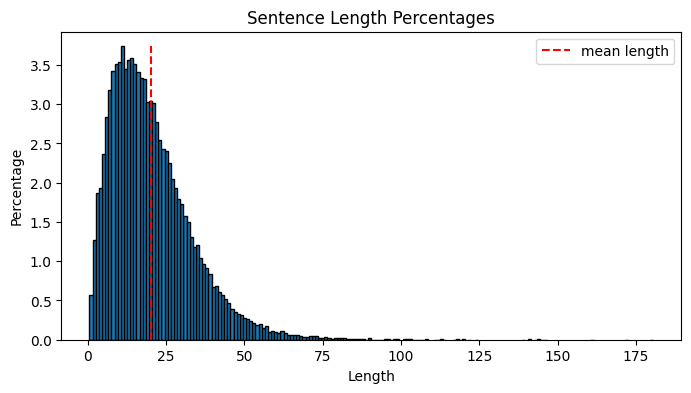

In [30]:
# Your code here
sentlen=[len(s) for s in brown.sents()]
sentlencounts = Counter(sentlen)
sentlenpercent = [(length, count /len(sentlen)  * 100) for length, count in sentlencounts.items()]
s, percent = zip(*sentlenpercent)
averagesentlen=sum(sentlen)/len(sentlen)# Average sentence length
plt.figure(num=None, figsize=(8, 4))
plt.bar(s,percent, width=1.0,edgecolor='black')
plt.vlines(x=averagesentlen, ymin=0, ymax=np.max(percent), color='red', linestyle='--', label='mean length')#vertical line of height max percent at average x
plt.legend()
plt.title('Sentence Length Percentages')
plt.xlabel("Length")
plt.ylabel("Percentage")
plt.show()